In [1]:
import json

In [2]:
characters = json.load(open("characters-with-description.json", "r"))
characters = list(filter(lambda x: "description" in x, characters))

In [3]:
sentences = list(map(lambda x: x["description"], characters))

In [4]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
output = model.encode(sentences=sentences, show_progress_bar=True, normalize_embeddings=True)

c:\Users\chick\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Batches:   0%|          | 0/111 [00:00<?, ?it/s]

In [5]:
output

array([[ 2.85384320e-02,  1.00294240e-02,  6.51500076e-02, ...,
         7.55396262e-02, -5.26841842e-02, -3.20142061e-02],
       [-2.87669487e-02,  1.85183305e-02,  3.42928432e-03, ...,
        -3.83458901e-05, -4.18452779e-03,  2.98224166e-02],
       [ 7.81157985e-03, -1.88004356e-02,  8.70852396e-02, ...,
         3.47832814e-02, -2.05789842e-02,  2.06849277e-02],
       ...,
       [ 1.95005361e-03,  1.09983226e-02,  5.50398678e-02, ...,
         4.53459658e-02,  8.06567818e-03,  1.39732128e-02],
       [-3.63526084e-02, -1.78433023e-02,  5.55314906e-02, ...,
         1.02653606e-02,  1.06064454e-02,  4.58928421e-02],
       [ 3.93744074e-02, -1.46065345e-02,  4.53601852e-02, ...,
         7.43956044e-02,  2.93410718e-02,  5.31644886e-03]], dtype=float32)

c:\Users\chick\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:1099: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


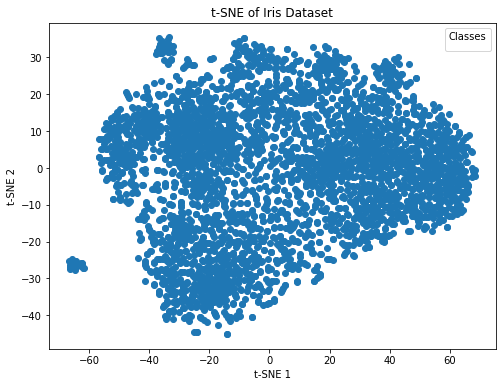

In [6]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# t-SNEの実行
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(output)

# 結果のプロット
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='viridis')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.title('t-SNE of Iris Dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

In [7]:
import chromadb
from chromadb.config import Settings

# ChromaDBの設定
client = chromadb.Client()

# コレクションの作成または取得
collection = client.get_or_create_collection(name="sentence_embeddings")

# データの挿入
for i, sentence in enumerate(sentences):
    collection.add(
        embeddings=[output[i].tolist()],
        metadatas=[{"sentence": sentence}],
        ids=[str(i)]
    )

In [15]:

# 橘ありすの説明
query = """髪の色は深いブラウンで、長い髪を一部リボンでまとめています。瞳の色は明るいブラウンで、顔立ちは優しい印象を与えます。目は普通の形状であり、つり目やたれ目の特徴はありません。服装は緑色を基調としたまるで制服のようなデザインで、白いフリルとアクセサリーが特徴です。全体として、元気で明るく、親しみやすい印象を受けます。"""

# クエリ文のベクトル化とコサイン類似度の計算
query_embedding = model.encode([query])[0].tolist()

# コサイン類似度の高い文を検索
results = collection.query(
    query_embeddings=[query_embedding],
    n_results=10  # 取得する類似文の数
)

# 結果の表示
for id_, result, distance in zip(results["ids"][0], results["metadatas"][0], results["distances"][0]):
    print(characters[int(id_)],  result["sentence"], " - Score:", distance)

{'anime_id': 101267, 'character_id': 129277, 'name': '橘ありす', 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b129277-Q8PcGzEmJ31J.png', 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b129277-Q8PcGzEmJ31J.png', 'description': '髪の色は深いブラウンで、長い髪を一部リボンでまとめています。瞳の色は明るいブラウンで、顔立ちは優しい印象を与えます。目は普通の形状であり、つり目やたれ目の特徴はありません。服装は緑色を基調としたまるで制服のようなデザインで、白いフリルとアクセサリーが特徴です。全体として、元気で明るく、親しみやすい印象を受けます。'} 髪の色は深いブラウンで、長い髪を一部リボンでまとめています。瞳の色は明るいブラウンで、顔立ちは優しい印象を与えます。目は普通の形状であり、つり目やたれ目の特徴はありません。服装は緑色を基調としたまるで制服のようなデザインで、白いフリルとアクセサリーが特徴です。全体として、元気で明るく、親しみやすい印象を受けます。  - Score: 5.715622202959181e-13
{'anime_id': 101360, 'character_id': 129346, 'name': '土宮明日架', 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/n129346-JUdwoPcYDAH0.jpg', 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/n129346-JUdwoPcYDAH0.jpg', 'description': '髪の色は黒で、髪型は左右にリボンで結ばれたツインテールになっています。瞳の色は赤で、顔立ちは普通のタイプです。服装は白いシャツにグレーのセーラー服風のジャケットを着ており、赤

In [14]:
for c in characters:
    if "あ" in c["name"]:
        display(c)

{'anime_id': 99807,
 'character_id': 142656,
 'name': '丸山あかね',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b142656-HiOdlf6sfSd5.png',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b142656-HiOdlf6sfSd5.png',
 'description': 'このキャラクターは、淡い青色の髪を持ち、髪型は少しウェーブのかかったロングヘアです。瞳も髪と同じく青色で、丸みを帯びた優しい目をしています。顔つきは柔らかく、たれ目気味で穏やかな印象を受けます。眼鏡をかけており、知的で落ち着いた雰囲気があります。服装は、白いブラウスに緑色のベストを重ね、さらに青系のスカートを合わせています。全体的に淡い色使いで、清楚で優雅な印象を与えるキャラクターです。'}

{'anime_id': 21366,
 'character_id': 24311,
 'name': '川本あかり',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/24311-WY1Q26PwwJeB.png',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/24311-WY1Q26PwwJeB.png',
 'description': '髪の色は茶色で、長い髪を後ろで束ねている。瞳の色は紫色で、顔立ちは優しげな普通の目をしている。服装は白い柄物のブラウスの上に明るいオレンジ色のカーディガンを羽織っており、全体的に柔らかく温かみのある雰囲気を持っている。表情はにっこりと微笑んでおり、優しく親しみやすい印象を受ける。'}

{'anime_id': 21417,
 'character_id': 89456,
 'name': '花咲里 あさみ',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/89456-wlZP1wDAy75k.jpg',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/89456-wlZP1wDAy75k.jpg',
 'description': '茶色の髪を持つこのアニメキャラクターは、ぱっちりとした紫色の瞳が特徴です。髪はおでこを露出させる形にスタイリングされ、顔つきはやや凛々しく、つり目のように見えます。白いシャツの上に黒いジャケットを着用しており、整った服装からはきちんとした印象を受けます。全体として、真面目で落ち着いた雰囲気を持ちつつも、少し挑戦的な態度も感じられます。'}

{'anime_id': 101043,
 'character_id': 125938,
 'name': '友希あいね',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b125938-Av2Zine3Fqtu.jpg',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b125938-Av2Zine3Fqtu.jpg',
 'description': '髪の色は明るいピンクで、髪の毛は長くてカールしており、サイドにはリボンが飾られています。瞳の色はオレンジと黄色のグラデーションで、大きく輝いています。顔つきはたれ目で、柔らかく愛らしい印象を与えます。服装はカラフルで華やかで、ピンクや黄色のリボン、青いハート型のアクセサリーが特徴的で、全体的にポップで可愛らしいデザインとなっています。明るくて元気な雰囲気が感じられ、見る人に幸福感をもたらすキャラクターです。'}

{'anime_id': 111082,
 'character_id': 88523,
 'name': '大空あかり',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/88523-mBiyaWFZIUYJ.png',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/88523-mBiyaWFZIUYJ.png',
 'description': '明るいオレンジ色の髪を持ち、頭の左側にはピンクの花が飾られています。瞳の色は鮮やかな赤紫色で、ぱっちりとした大きな目が特徴です。顔つきは普通で、悦びや楽しいことを感じさせる表情をしています。服装は、青色を基調としたフリルのついた衣装を着ており、フリルにはピンク色のアクセントが施されています。全体的に明るく元気な印象を受け、楽しさやポジティブなエネルギーが伝わってきます。'}

{'anime_id': 21648,
 'character_id': 121711,
 'name': '早乙女あこ',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b121711-ksmgRzhLfRrd.jpg',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b121711-ksmgRzhLfRrd.jpg',
 'description': '明るいオレンジ色の髪をしており、ややウェーブがかかったスタイルのキャラクターです。瞳の色は緑色で、目の形はぱっちりとしていて普通の形の目をしています。表情は楽しげで、元気の良い印象を与えます。彼女の服装は、ピンク色のトップスに黄色のリボンが付いていて、首には鐘の付いたチョーカーをしています。また、彼女は緑色の飲み物をストローで飲んでおり、その様子からは陽気で愛らしい雰囲気が感じられます。'}

{'anime_id': 101360,
 'character_id': 129344,
 'name': 'みあシルバーストーン',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/n129344-R1cP8a8UHBP9.jpg',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/n129344-R1cP8a8UHBP9.jpg',
 'description': '銀髪に澄んだ金色の瞳が特徴的なキャラクターです。髪は長く、顔周りにかかる前髪と、ゆるやかにウェーブしたスタイルが上品な印象を与えます。彼女の瞳はやや大きく、たれ目の形をしているため、優しさや穏やかさを感じさせます。衣装は白を基調にしており、胸元に大きな黄色のリボンが特徴で、制服のような清楚なデザインになっています。全体的な雰囲気は、落ち着きと品格を持ち合わせた、知的で柔らかな印象を抱かせます。'}

{'anime_id': 21320,
 'character_id': 125914,
 'name': '星あさみ',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/125914-REaXaNhWJxSW.jpg',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/125914-REaXaNhWJxSW.jpg',
 'description': 'キャラクターは茶色の髪と茶色の瞳を持っています。髪は肩までの長さでストレートです。瞳は大きく、顔つきはたれ目で柔らかい印象を与えます。服装は白とピンクのトップスを着ており、カジュアルで親しみやすい雰囲気を醸し出しています。全体的に明るく元気な印象を与える外見です。'}

{'anime_id': 103900,
 'character_id': 125599,
 'name': '小美浪あすみ',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b125599-lRbcA9Ijf7yf.png',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b125599-lRbcA9Ijf7yf.png',
 'description': '髪の色は鮮やかな紫色で、長く流れるような髪が特徴です。瞳の色も髪と同様に紫色ですが、少し光沢があり、輝いて見えます。顔つきはつり目で、少し挑発的な印象を与えます。服装は豪華でエレガントなもので、紫と金色の装飾が目立ちます。また、頭には黄金の鎖や花のアクセサリーが飾られており、より貴族的な雰囲気を醸し出しています。全体的に見ると、ミステリアスで自信に満ちた印象を受けます。'}

{'anime_id': 112258,
 'character_id': 169750,
 'name': '舎川あこ',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b169750-gi5ioh3VTsIV.png',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b169750-gi5ioh3VTsIV.png',
 'description': '髪の毛はピンク色で、ポニーテールにしており、前髪が斜めに流れています。瞳の色は赤色です。顔つきはつり目で、鋭い印象を受けます。服装は日本の伝統的なセーラー服で、白いブラウスに黒と白の襟がついており、首の周りに黒いリボンが結ばれています。また、スカートは黒と白のチェック柄です。全体的に、強気で自信に満ちた印象を与えるキャラクターです。'}

{'anime_id': 101267,
 'character_id': 129277,
 'name': '橘ありす',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b129277-Q8PcGzEmJ31J.png',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b129277-Q8PcGzEmJ31J.png',
 'description': '髪の色は深いブラウンで、長い髪を一部リボンでまとめています。瞳の色は明るいブラウンで、顔立ちは優しい印象を与えます。目は普通の形状であり、つり目やたれ目の特徴はありません。服装は緑色を基調としたまるで制服のようなデザインで、白いフリルとアクセサリーが特徴です。全体として、元気で明るく、親しみやすい印象を受けます。'}

{'anime_id': 101267,
 'character_id': 88635,
 'name': '赤城みりあ',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b88635-LJm9OQKMefNZ.png',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b88635-LJm9OQKMefNZ.png',
 'description': '髪の色は濃い茶色で、ツインテールにリボンがついています。瞳の色は明るい茶色で、大きくて魅力的な目をしています。顔立ちはたれ目で、可愛らしい印象を受けます。服装は黄色と赤が基調で、リボンがアクセントとなっておりカジュアルで親しみやすい印象を与えます。全体として、元気で無邪気な雰囲気が漂っています。'}

{'anime_id': 125682,
 'character_id': 204412,
 'name': '恵庭あいり',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b204412-OPogoUyIvULO.jpg',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b204412-OPogoUyIvULO.jpg',
 'description': '髪の色は黒で、短めのボブカットのヘアスタイルをしています。瞳の色は鮮やかな青色で、目はぱっちりとした感じで少したれ目気味です。白い襟と紫色の制服を着ており、頭には白い帽子をかぶっています。全体的に明るく元気な印象を受け、可愛らしさと無邪気さが感じられます。背景にカラフルな光景が広がっており、キャラクターの表情も驚いたようなポジティブなものです。'}

{'anime_id': 142080,
 'character_id': 260908,
 'name': '菓彩あまね',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b260908-lYwmFvAAnexX.jpg',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b260908-lYwmFvAAnexX.jpg',
 'description': '長いブロンドの髪を持つこのアニメキャラクターは、髪型が前髪をまっすぐ下ろしたスタイルで、サイドに大きくカールしています。瞳の色は明るい青色で、目元が大きくキラキラした印象です。瞳の形は一般的に普通で、たれ目やつり目などの特徴はありません。彼女の服装は白とピンクを基調としたゴージャスなドレスで、胸元には大きな宝石が施されています。全体的な印象はお姫様のようで、優雅で華やかな雰囲気を醸し出しています。'}

{'anime_id': 131518,
 'character_id': 127445,
 'name': 'あさぎりゲン',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b127445-oUCyS7Tl8l5D.png',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b127445-oUCyS7Tl8l5D.png',
 'description': 'キャラクターの髪の色は黒と白のツートンカラーで、右側が黒、左側が白となっています。鋭い目つきのつり目を持っており、瞳の色は明るい紫色です。顔には目立つ傷があり、口元に不敵な笑みを浮かべていることから、挑戦的で自信に満ちた印象を受けます。首には包帯のようなものが巻かれており、このキャラクターの一部の個性を強調しています。背景には自然が広がっているため、場所は屋外のようです。'}

{'anime_id': 97874,
 'character_id': 121478,
 'name': '源内 あお',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/121478-SAqVQ2LMOA9f.jpg',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/121478-SAqVQ2LMOA9f.jpg',
 'description': 'このキャラクターの髪の色は黒色で、やや長めにカットされています。瞳の色は赤色で、表情からは活発さや元気な感じが伝わります。顔つきはややたれ目で、全体的に柔らかく親しみやすい印象を受けます。服装はカジュアルで、上衣は黄緑色の羽織り物を身に着けており、その下にはピンク色のトップスが見えます。全体的にこのキャラクターは明るくて人懐っこい雰囲気を持っているようです。'}

{'anime_id': 21156,
 'character_id': 89175,
 'name': '松嶋あい',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/89175-ZyW2s1wQfDpU.jpg',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/89175-ZyW2s1wQfDpU.jpg',
 'description': '髪の色は淡い茶色で、サイドに大きな緑色のリボンを付けています。瞳の色は茶色で、顔つきはつり目のように見えます。横顔だけが描かれているため、服装や詳細な表情はわかりませんが、笑っている表情から活動的で陽気な印象を受けます。'}

{'anime_id': 98059,
 'character_id': 122792,
 'name': '剣城あきら',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b122792-t4JzyUANgxXg.png',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b122792-t4JzyUANgxXg.png',
 'description': '髪の色は鮮やかなピンク色で、独特のデザインでスタイリングされています。瞳の色は同じくピンク色で、大きく魅力的な目をしています。顔つきは柔らかく微笑んでおり、角度によってはどちらかと言えばつり目に見えます。服装は特徴的で、赤色を基調とした豪華な装いであり、首には黒いチョーカーと宝石のようなアクセサリーが見えます。全体的な印象としては、華やかでエネルギッシュでありながらもエレガントさを兼ね備えたキャラクターといえます。'}

{'anime_id': 98059,
 'character_id': 122791,
 'name': '立神あおい',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b122791-E0v9MsCc5C2J.jpg',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b122791-E0v9MsCc5C2J.jpg',
 'description': 'キャラクターの髪の色は鮮やかな青で、長い髪を特徴としています。瞳の色も同じく青で、表情からは元気で明るい性格が伺えます。顔つきは大きな瞳が特徴的で、少しつり目の印象を与えます。服装は白や薄い青を基調としたデザインで、首には青のチョーカーを着けており、全体的に冬のイメージを連想させるコスチュームです。キャラクターから受ける印象は非常に活発でエネルギッシュ、さらに親しみやすく魅力的な雰囲気を醸し出しています。'}

{'anime_id': 101097,
 'character_id': 129843,
 'name': '赤城あんな',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b129843-4LYejZlZ3T97.jpg',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b129843-4LYejZlZ3T97.jpg',
 'description': 'このキャラクターは目を引くピンク色の髪を持ち、髪はツインテールにされており、髪飾りとしてバラの花があしらわれています。瞳は大きくて黄色であり、きらきらと輝いています。顔つきは愛らしく、目はクリッと上向きのタレ目で、非常に明るく楽しげな表情をしています。衣装は可愛らしさを強調するためにピンクと白を基調としており、バラのモチーフが散りばめられています。全体的に華やかで可愛い印象を受けるキャラクターです。'}

{'anime_id': 108625,
 'character_id': 159495,
 'name': '虹ノ咲 だいあ',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b159495-jjOvlzlmiPbG.png',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b159495-jjOvlzlmiPbG.png',
 'description': '髪は長くて濃い茶色で、前髪が目元を完全に覆っています。瞳は隠れていて見えません。顔つきからは感情が読み取りにくく、無表情に近い印象を受けます。衣装は黄色い制服の上に白い襟とピンクのリボンが特徴的で、制服のスタイルは学生を連想させます。全体的に、落ち着いた雰囲気でありながら、少し神秘的な印象を与えます。'}

{'anime_id': 108625,
 'character_id': 137151,
 'name': '金森まりあ',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b137151-9KAnO2YWCWo0.png',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b137151-9KAnO2YWCWo0.png',
 'description': '髪の色はブラウンで、長い髪をツインテールにして両側にリボンで結んでいます。瞳の色は明るいブルーで、大きくて丸い目をしています。顔つきは普通で、柔らかい雰囲気があります。服装はピンクを基調とした可愛らしいドレスで、首元にはハート型のアクセサリーをつけています。全体として非常に可愛らしく、明るく無邪気な印象を受けるキャラクターです。'}

{'anime_id': 108625,
 'character_id': 137149,
 'name': 'だいあ',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b137149-87UhnTzZ1N4l.png',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b137149-87UhnTzZ1N4l.png',
 'description': 'このアニメキャラクターは明るい金髪で、髪の一部がピンクと青色のツインテールになっています。瞳の色は青色で、片方の目をウインクしています。顔つきは通常で、たれ目やつり目の特徴はありません。服装は非常にカラフルで祭りのようなデザインをしており、ヘッドアクセサリーとしてカップケーキのような帽子をかぶっています。全体的にポップで楽しい、明るく元気な印象を受けます。'}

{'anime_id': 98385,
 'character_id': 122212,
 'name': '橘あきら',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b122212-hv2e72Zeu2IO.jpg',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b122212-hv2e72Zeu2IO.jpg',
 'description': '暗い色合いの髪を持ち、前髪が額にかかっているスタイルで、瞳は大きく深い青紫色をしています。顔つきは切れ長で涼しげな目をしており、少しつり目の印象を受けます。服装については画像の範囲では詳細が見えづらいですが、肩口まではシンプルかつ落ち着いた色調の衣装を着ているようです。全体的な印象としては、内向的で少しミステリアスな雰囲気を持っているように感じられます。'}

{'anime_id': 108092,
 'character_id': 140052,
 'name': '真中あお',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b140052-nsezEkOHjT5w.png',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b140052-nsezEkOHjT5w.png',
 'description': '青紫色の髪の毛を持っており、ロングヘアで先が少しウェーブしています。瞳の色は鮮やかな水色で、少し大きめの瞳が特徴です。顔つきは柔らかく、優しげな印象を与える普通の目をしています。服装は青系のセーラー服で、首元に緑色のリボンが結ばれています。このキャラクターは全体的に清楚で落ち着いた雰囲気を持っており、優しさや儚さを感じさせる印象です。'}

{'anime_id': 115892,
 'character_id': 167946,
 'name': 'ばあさん',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b167946-lOR8s9Svef40.jpg',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b167946-lOR8s9Svef40.jpg',
 'description': '髪の色は灰色で、短くカットされています。瞳の色は黒です。顔つきはたれ目で優しい印象を与えます。服装は赤いタートルネックのセーターを着ており、全体的に落ち着いた雰囲気があります。控えめでやや心配そうな表情が特徴で、認識力がありそうな穏やかな印象を受けます。'}

{'anime_id': 97862,
 'character_id': 153095,
 'name': 'あきたこまち',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b153095-mGg3sl2fU2VW.jpg',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b153095-mGg3sl2fU2VW.jpg',
 'description': '長い黒髪を持ち、髪の一部は白いメッシュが入っています。特徴的なのは前髪が片目を覆っていることで、ミステリアスな雰囲気を醸し出しています。瞳の色は赤で、意志の強さを感じさせます。顔つきは、少しつり目の形状をしており、真剣な表情が印象的です。服装は赤い制服で、細部には黄色のラインが入っており、襟元には青いアクセントが見られます。全体的に高貴で冷静な印象を与えながらも、決断力と強い意志が感じられるキャラクターです。'}

{'anime_id': 103222,
 'character_id': 133426,
 'name': '大鳥居あすか',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/n133426-72voTuGenu10.png',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/n133426-72voTuGenu10.png',
 'description': '髪の色は灰色で、長いストレートヘアを持つキャラクターです。瞳の色は鮮やかな青色をしています。顔つきはしっかりとしたつり目で、強い意思を感じさせる表情をしています。服装はクラシックなメイド風のデザインで、主に黒と緑のカラーが使われています。胸元に赤いリボンが結ばれており、襟元や袖、スカートの裾に白いフリルがあしらわれています。頭には白いヘッドドレスと赤いバラの飾りがあり、全体的に非常にきちんとした印象があります。総じて真面目で強そうなキャラクターという印象を受けます。'}

{'anime_id': 100871,
 'character_id': 164733,
 'name': 'あずき',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b164733-xmtiZ6qcJdhC.png',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b164733-xmtiZ6qcJdhC.png',
 'description': 'アニメキャラクターは白地の猫で、複数の色が混じった模様を持っています。耳と体の一部に茶色とオレンジ色の斑点があり、耳の内側は特に濃い色合いです。顔にはシンプルな表情が描かれており、目は細く、小さな口が丁寧に表現されています。顔つきは穏やかで、ほのぼのとした印象を受けます。また、服装としては何も身に付けておらず、自然な猫の姿をしています。このキャラクターは可愛らしく、見る人に癒しの感覚を与えてくれます。'}

{'anime_id': 117989,
 'character_id': 205447,
 'name': '早乙女あてな',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b205447-3ZEh8fAGACjb.png',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b205447-3ZEh8fAGACjb.png',
 'description': 'このキャラクターはピンク色の髪を持ち、美しいブルーの瞳をしている。顔つきは普通で、特にはっきりとしたたれ目やつり目ではない。白いフリルのついたヘッドドレスをかぶり、メイド服を着ており、黒と白を基調としたデザインが特徴的である。全体的に、清楚で丁寧な印象を受け、落ち着いた雰囲気を持っている。'}

{'anime_id': 130777,
 'character_id': 289623,
 'name': 'ちあ',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b289623-QpTD46sA68a3.png',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b289623-QpTD46sA68a3.png',
 'description': 'ピンクの毛並みが特徴的なキャラクターで、瞳の色は紫色です。目はくりっとした可愛らしい形をしており、少し丸い印象を与える瞳の形です。頭には水色のリボンが飾られており、さらに背中には小さな翼もあります。服装は水色のセーラー風の衣装で、全体的に柔らかく愛らしい印象を受けます。細部にわたってデザインにはハートやリボンが使われており、全体的にとてもキュートでファンシーな雰囲気が漂います。'}

{'anime_id': 21134,
 'character_id': 248336,
 'name': '雲母あいり',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b248336-ZL5fUmjBmnKs.png',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b248336-ZL5fUmjBmnKs.png',
 'description': '髪の色は明るい茶色で、ツインテールに結んでおり、片方の髪には赤いチェリーの飾りが付いています。瞳の色は茶色で優しい印象を与えます。目の形は少したれ目で、穏やかな表情をしています。服装はポップでカジュアルで、薄い緑色のジャケットにストライプのシャツ、サーモンピンク色のショートパンツを着ています。首にはピンクのペンダントをしています。全体的に明るく無邪気な印象を受けます。'}

{'anime_id': 98379,
 'character_id': 1789,
 'name': '閻魔あい',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b1789-8RLKp57peoIK.jpg',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b1789-8RLKp57peoIK.jpg',
 'description': '長い黒髪と赤い瞳を持ち、顔つきはやや切れ長の目をしている。彼女の表情は冷静で神秘的な雰囲気を醸し出しており、感情をあまり表に出さない印象がある。服装は伝統的な和服で、特に華やかな柄の着物を着ており、その背後には蝶のような装飾が見える。全体的にミステリアスで落ち着いた印象を与えるキャラクターである。'}

{'anime_id': 124131,
 'character_id': 197264,
 'name': '守野せりあ',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b197264-aEgvUBpG3QER.png',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b197264-aEgvUBpG3QER.png',
 'description': 'キャラクターは茶色の髪を持っており、髪の長さは肩にかかる程度で、黄色のヘアバンドが特徴的です。瞳の色は明るい青色で、大きく輝いています。顔つきは普通で、微笑みをたたえた表情が愛らしい印象を与えます。服装は赤と白を基調とした学生服風の衣装で、清潔感があります。全体的に親しみやすく、優しさと元気さが伝わるキャラクターです。'}

{'anime_id': 124131,
 'character_id': 197265,
 'name': '各務あいり',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b197265-OKKJk7LEmDgq.png',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b197265-OKKJk7LEmDgq.png',
 'description': '髪の色は暗い茶色で、ストレートにカットされて肩にかかるくらいの長さです。瞳の色は茶色で、大きくて感じの優しい目つきをしています。顔つきは普通で、にっこりとした優しい表情から、温厚でフレンドリーな印象を受けます。服装はカジュアルで、オレンジと白が入ったラグランスリーブのTシャツを着ています。全体的に、明るくて親しみやすい印象を与えるキャラクターです。'}

{'anime_id': 99586,
 'character_id': 126574,
 'name': '大城あかり',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b126574-7OBa5g8PwJx5.png',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b126574-7OBa5g8PwJx5.png',
 'description': '髪の色は紫がかった薄いピンクで、長さは肩まで届かない程度のセミロングです。髪を前髪にピンで留めています。瞳の色はピンクで、輝きがあり活気があります。顔つきは普通で、特にたれ目やつり目の要素は見られません。服装はビキニの上を身に着けており、首周りには太いストラップがあります。全体的に夏らしい爽やかな印象を受け、明るく元気な雰囲気があります。'}

{'anime_id': 104461,
 'character_id': 124577,
 'name': '犬山あおい',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b124577-LA9JusqQcAJV.png',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b124577-LA9JusqQcAJV.png',
 'description': 'アニメキャラクターの髪の色は淡い茶色で、長めの髪がふんわりと流れています。瞳は鮮やかな緑色で、大きく丸い目が特徴的です。顔つきは柔らかく、どちらかと言えばたれ目で優しげな印象を与えます。服装はカラフルな格子模様の服を着ており、明るく元気な雰囲気を持っています。全体的な印象としては、優しく親しみやすいキャラクターであり、温かみを感じさせるデザインです。'}

{'anime_id': 21460,
 'character_id': 88915,
 'name': '田中あすか',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b88915-t3WXoIoc6sAz.png',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b88915-t3WXoIoc6sAz.png',
 'description': '髪の色はダークな黒に近い深い青色で、長くてサラサラしています。瞳の色は鮮やかな水色で、非常に印象的です。顔つきは柔らかく親しみやすいため、たれ目のような印象を受けます。メガネをかけており、知的で優しい雰囲気があります。服装は花柄の装飾が施されたピンク色のドレスを着ており、耳元には花の髪飾りとリボンがついていて華やかです。全体的には落ち着いた美しさと繊細さを感じさせるキャラクターです。'}

{'anime_id': 20991,
 'character_id': 55489,
 'name': '間宮あかり',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/55489.jpg',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/55489.jpg',
 'description': 'このキャラクターは明るいオレンジ色の髪を持ち、紫色の大きな瞳が特徴です。髪は両サイドにまとめられ、リボンで結んであります。表情は元気で生き生きとしており、顔つきは普通の目が特徴ですが、少しつり目がちです。赤いセーラー服に白いトップスという学生風の衣装を着ており、全体的に活動的でエネルギッシュな印象を受けます。背景には血飛沫が描かれており、キャラクターの背後には何か激しいアクションがあったのかもしれないという緊張感を感じさせます。'}

{'anime_id': 87517,
 'character_id': 121493,
 'name': '中島ゆあ',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/n121493-TQFnJTwUf1Zf.png',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/n121493-TQFnJTwUf1Zf.png',
 'description': 'このキャラクターの髪の色は濃い紫色で、瞳の色は金色です。顔つきはつり目で、凛々しい印象を受けます。彼女の服装は赤いセーラー服で、下に白と赤のストライプ柄のシャツを着ています。全体的に落ち着いた魅力を放ちながらも、可愛らしさと強さを併せ持っているように見えます。'}

{'anime_id': 157883,
 'character_id': 296119,
 'name': '聖あげは',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b296119-0fONDsuwGOd9.jpg',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b296119-0fONDsuwGOd9.jpg',
 'description': '金色の髪を持っており、髪は長くて艶やかです。前髪には大きなピンク色のリボンをつけています。瞳の色は紫で、キラキラとした輝きを持っています。顔つきはつり目で、少し挑戦的で自信に満ち溢れた表情をしています。服装は派手なピンク色のドレスを着ており、手にはピンク色のグローブも装着しています。全体的に鮮やかで華やかな印象を受けます。'}

{'anime_id': 17919,
 'character_id': 38767,
 'name': 'あおい',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b38767-YGD7LFFkyFNi.jpg',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b38767-YGD7LFFkyFNi.jpg',
 'description': '画像のキャラクターについて説明します。髪は明るい青色で、短くて整えられたスタイルです。瞳の色も髪と同様に青色で、眼鏡をかけています。顔つきはタレ目で、親しみやすい柔らかい印象を受けます。服装は白いシャツの上にセーラー服風の上着を羽織っており、上着には黒猫のシンボルがついています。全体的に、可愛らしくて知的な雰囲気が漂っています。'}

{'anime_id': 98107,
 'character_id': 127784,
 'name': '黒須あろま',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/n127784-MY4zjQo8guJT.png',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/n127784-MY4zjQo8guJT.png',
 'description': '髪の色は濃い茶色で、瞳の色は明るい青です。顔つきはつり目で、活発さや自信を感じさせます。服装は濃い青色を基調としており、紫や黄色のアクセントが加えられています。特に大きなリボンや帽子が印象的です。全体的に、元気で自己主張が強そうな雰囲気が漂っており、個性的で明るい印象を受けます。'}

{'anime_id': 124555,
 'character_id': 190414,
 'name': 'あいな',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b190414-tmwVa3fBFb7n.png',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b190414-tmwVa3fBFb7n.png',
 'description': '髪の色は明るい赤色で、長くまっすぐに伸びている。瞳の色は黄色で、優しい表情をしていることから普通もしくはたれ目に近い顔つきをしている。服装は、白いシャツをベースに赤いリボンとチェック柄のネクタイを着用し、襟元にはエンブレムの付いたバッジがある。また、髪飾りとして紫色や黒色のリボンや飾りを付けている。全体的に明るく元気な印象を受けるキャラクターで、親しみやすさと可愛らしさが特徴である。'}

{'anime_id': 124555,
 'character_id': 190415,
 'name': 'あみ',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b190415-2V5SYcys1ZRC.png',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b190415-2V5SYcys1ZRC.png',
 'description': '紫色の髪を持ち、瞳の色は黄色です。顔つきは普通で、特にたれ目やつり目という特徴は見受けられません。服装は白いシャツに青いネクタイを身に着けており、ネクタイには黄色の縁取りがあります。全体的にはフレンドリーで親しみやすい印象を受けます。'}

{'anime_id': 132528,
 'character_id': 250,
 'name': '月宮あゆ',
 'image_url_medium': 'https://s4.anilist.co/file/anilistcdn/character/medium/b250-nHDtLhTa83UB.png',
 'image_url_large': 'https://s4.anilist.co/file/anilistcdn/character/large/b250-nHDtLhTa83UB.png',
 'description': 'キャラクターは明るい茶色の髪を持ち、前髪はまっすぐにカットされ、長い髪は肩にかかる程度です。髪には赤いヘアバンドを付けており、全体として元気で活発な印象を受けます。瞳は大きくて丸く、赤みがかっています。表情は柔らかく、口角が上がっているため、明るく親しみやすい雰囲気が特徴です。目はややつり目傾向ですが、優しげな印象を与えています。服装は、黄色のフード付き上着に赤いチェック柄のマフラーを巻いており、寒い季節を連想させます。全体として、親しみやすく、元気で活発な印象を受けます。'}